In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,18.556429,18.685356,18.299286,18.303213,16.067413,262620400
1,2013-11-08,18.377857,18.611786,18.306786,18.591429,16.320423,279316800
2,2013-11-11,18.571072,18.631071,18.371786,18.537500,16.273079,227452400
3,2013-11-12,18.488214,18.711430,18.464287,18.571787,16.303186,204276800
4,2013-11-13,18.500000,18.651787,18.462856,18.593929,16.322620,197220800
...,...,...,...,...,...,...,...
2511,2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000
2512,2023-11-01,171.000000,174.229996,170.119995,173.970001,173.970001,56934900
2513,2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2514,2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700


In [4]:
df['Volume'].value_counts()

Volume
90956700     2
200760000    2
146640000    2
146118800    2
150347200    2
            ..
78451200     1
69686800     1
61236400     1
102767200    1
63803700     1
Name: count, Length: 2508, dtype: int64

In [5]:

data = df['Volume'].values
data

array([262620400, 279316800, 227452400, ...,  77334800,  79763700,
        63803700], dtype=int64)

In [6]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

sequence_length = 5  # Adjust this as needed
sequences = []
targets = []

for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    targets.append(data[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

In [7]:
targets

array([[0.24269364],
       [0.27702533],
       [0.20645298],
       ...,
       [0.0443653 ],
       [0.04671418],
       [0.03127995]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape)

(2008, 5, 1)


In [10]:
model_rnn = keras.Sequential(name="RNN")
model_rnn.add(keras.layers.SimpleRNN(256, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(keras.layers.Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

d:\anaconda\envs\BIA\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
from tensorflow.keras import layers, models

model_rnn = models.Sequential(name="RNN")
model_rnn.add(layers.SimpleRNN(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_rnn.add(layers.SimpleRNN(50, activation='relu'))
model_rnn.add(layers.Dense(64, activation='relu'))
model_rnn.add(layers.Dropout(0.3))
model_rnn.add(layers.Dense(32, activation='relu'))
model_rnn.add(layers.Dense(1))
model_rnn.compile(optimizer='RMSprop', loss='mean_squared_error')


In [12]:
model_rnn.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0038
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0027
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0027
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0025
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0024
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0024
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0023
Epoch 9/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0024
Epoch 10/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023


In [13]:
model_lstm = keras.Sequential(name="LSTM")
model_lstm.add(keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(keras.layers.Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0078
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025
Epoch 13/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026
Epoch 14/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023
Epoch 15/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022
Epoc

In [16]:
model_gru = keras.Sequential(name="GRU")
model_gru.add(keras.layers.GRU(100, activation='tanh', input_shape=(X_train.shape[1], 1)))
model_gru.add(keras.layers.Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model_gru.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0047
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025


In [18]:
print(X_test.shape)

(503, 5, 1)


In [19]:
def evaluate_model(model, X_test, y_test):
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_pred = model.predict(X_test_reshaped)
    # print(y_pred)
    y_pred = scaler.inverse_transform(y_pred).flatten()
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse_rnn = evaluate_model(model_rnn, X_test, y_test)
mse_lstm = evaluate_model(model_lstm, X_test, y_test)
mse_gru = evaluate_model(model_gru, X_test, y_test)

print(f"RNN Mean Squared Error: {mse_rnn}")
print(f"LSTM Mean Squared Error: {mse_lstm}")
print(f"GRU Mean Squared Error: {mse_gru}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
RNN Mean Squared Error: 4585970349443131.0
LSTM Mean Squared Error: 4432367147088736.0
GRU Mean Squared Error: 4246751933346766.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


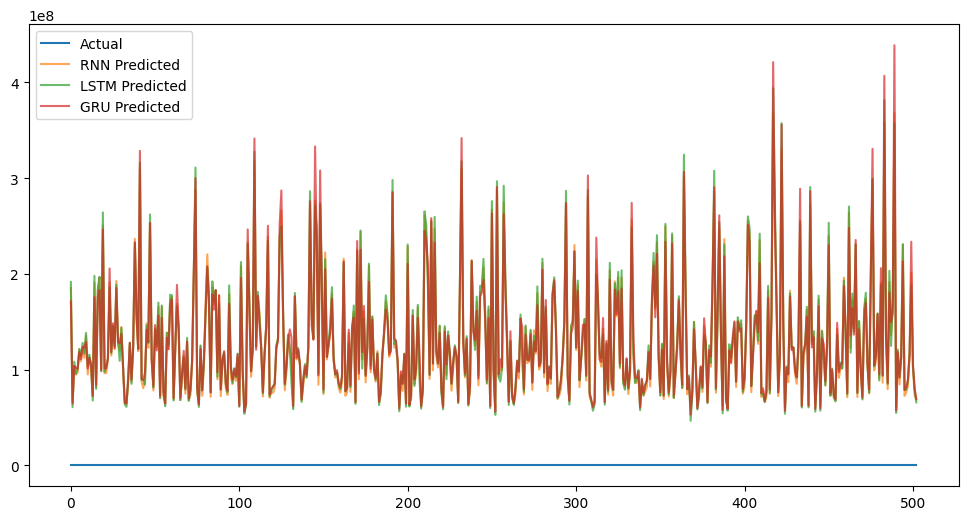

In [21]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_gru, label='GRU Predicted', alpha=0.7)
plt.legend()
plt.title('')
plt.show()